In [37]:
!pip install ultralytics

from ultralytics import YOLO
import os
import random
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import xml.etree.ElementTree as ET
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Załaduj zbiór i wyświetl przykładowe obrazy

In [38]:
# Ścieżki do folderów z obrazami
train_dir = '/content/drive/MyDrive/fruit detection/train'
test_dir = '/content/drive/MyDrive/fruit detection/test'

In [39]:

def load_and_display_images(directory, num_images=5):
  """Loads and displays a specified number of random images from a directory."""

  image_files = [f for f in os.listdir(directory) if f.endswith(('.jpg', '.png', '.jpeg'))]
  if not image_files:
    print(f"No image files found in {directory}")
    return

  random_images = random.sample(image_files, min(num_images, len(image_files)))

  for image_file in random_images:
    image_path = os.path.join(directory, image_file)
    img = cv2.imread(image_path)
    if img is not None:
      plt.figure(figsize=(6, 6))
      plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      plt.title(image_file)
      plt.axis('off')
      plt.show()
    else:
      print(f"Could not load image: {image_path}")



Example training images:


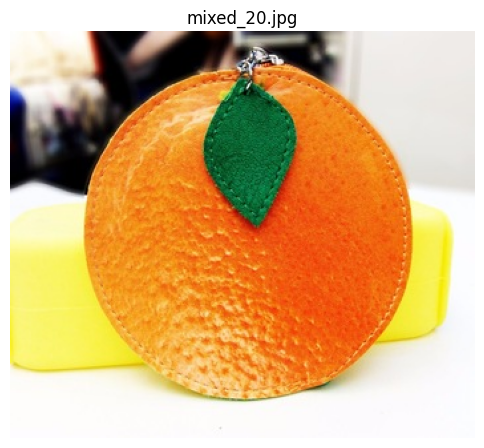

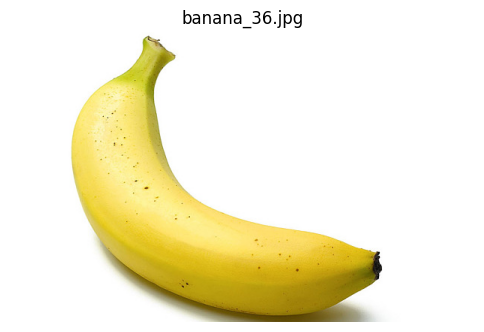

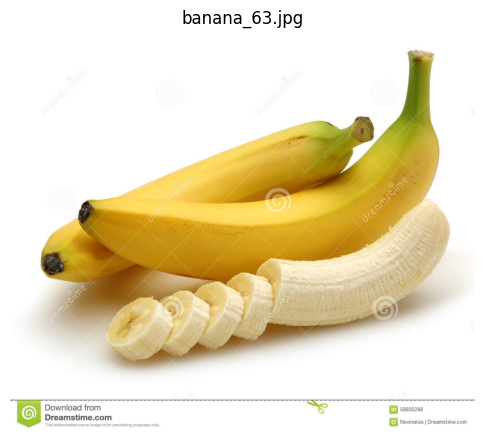

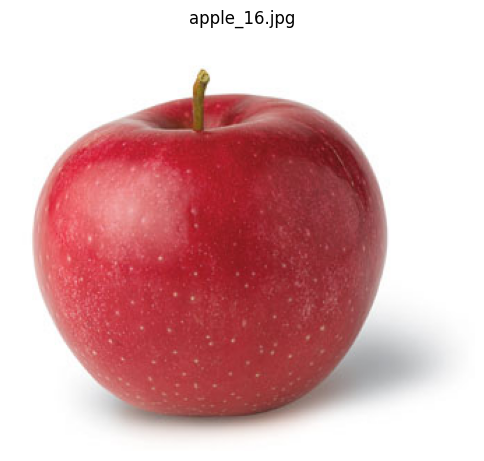

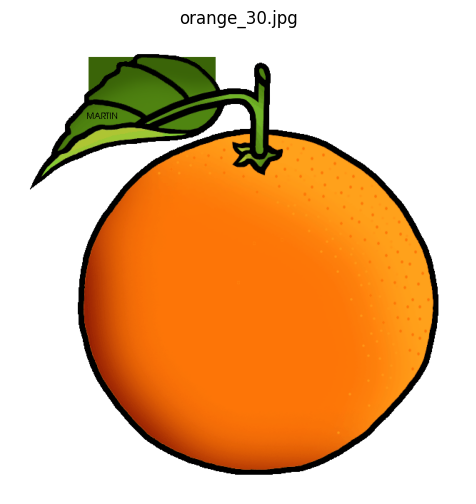

In [40]:
# Display some training images
print("Example training images:")
load_and_display_images(train_dir)




Example test images:


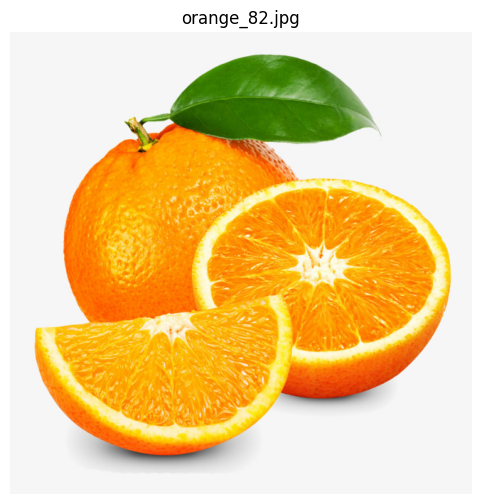

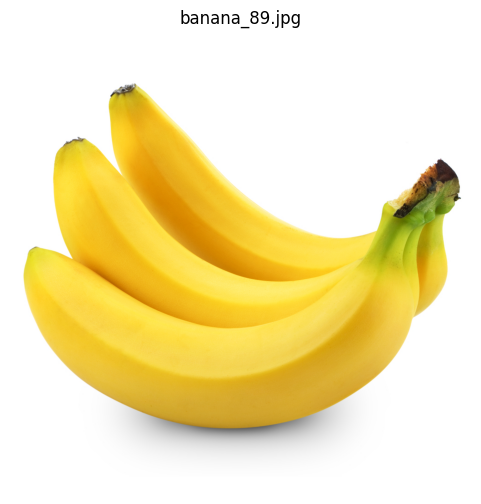

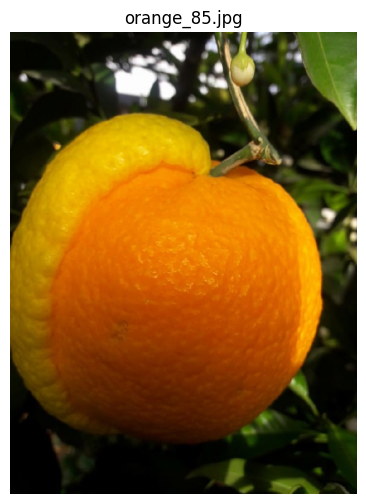

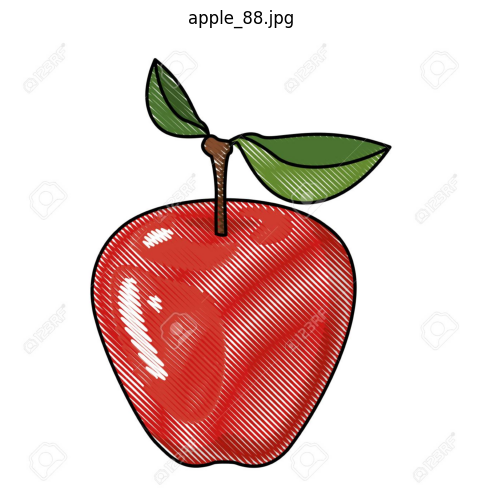

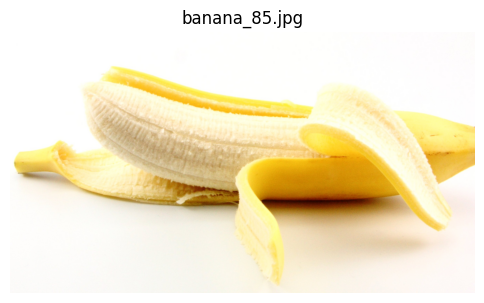

In [41]:
# Display some test images
print("\nExample test images:")
load_and_display_images(test_dir)

# 2. Wyciągnij z plików XML etykiety oraz bounding boxes

In [42]:
def extract_labels_bboxes(xml_dir):
  """Extracts labels and bounding boxes from XML annotation files."""

  labels = []
  bboxes = []

  for xml_file in os.listdir(xml_dir):
    if xml_file.endswith('.xml'):
      tree = ET.parse(os.path.join(xml_dir, xml_file))
      root = tree.getroot()

      for object_element in root.findall('object'):
        label = object_element.find('name').text
        bbox_element = object_element.find('bndbox')
        xmin = int(bbox_element.find('xmin').text)
        ymin = int(bbox_element.find('ymin').text)
        xmax = int(bbox_element.find('xmax').text)
        ymax = int(bbox_element.find('ymax').text)

        labels.append(label)
        bboxes.append([xmin, ymin, xmax, ymax])

  return labels, bboxes




In [43]:
# Ścieżka do folderu z plikami XML
train_xml_dir = '/content/drive/MyDrive/fruit detection/train'  # Upewnij się, że ścieżka jest poprawna
test_xml_dir = '/content/drive/MyDrive/fruit detection/test'


# Wyciągnij etykiety i bounding boxes dla zbioru treningowego
train_labels, train_bboxes = extract_labels_bboxes(train_xml_dir)
print(f"Number of training labels: {len(train_labels)}")



Number of training labels: 465


In [44]:
# Wyciągnij etykiety i bounding boxes dla zbioru testowego
test_labels, test_bboxes = extract_labels_bboxes(test_xml_dir)
print(f"Number of test labels: {len(test_labels)}")

# Możesz teraz wyświetlić przykładowe etykiety i bounding boxes
# np. dla pierwszych 10 przykładów
for i in range(min(10, len(train_labels))):
  print(f"Label: {train_labels[i]}, Bounding Box: {train_bboxes[i]}")

Number of test labels: 117
Label: apple, Bounding Box: [147, 218, 336, 412]
Label: apple, Bounding Box: [99, 131, 264, 316]
Label: apple, Bounding Box: [235, 142, 404, 324]
Label: apple, Bounding Box: [136, 199, 569, 628]
Label: apple, Bounding Box: [23, 55, 458, 497]
Label: apple, Bounding Box: [97, 127, 346, 379]
Label: apple, Bounding Box: [314, 112, 594, 385]
Label: apple, Bounding Box: [37, 52, 205, 222]
Label: apple, Bounding Box: [110, 730, 913, 1551]
Label: apple, Bounding Box: [1, 1, 407, 617]


# 3 Wykorzystaj YOLO (np. w wersji 8) do detekcji owoców na kilku przykładowych obrazach


image 1/1 /content/drive/MyDrive/fruit detection/test/apple_78.jpg: 640x640 1 apple, 736.7ms
Speed: 8.3ms preprocess, 736.7ms inference, 9.9ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([47.])
conf: tensor([0.6585])
data: tensor([[ 15.7469,  13.6492, 339.2767, 341.5811,   0.6585,  47.0000]])
id: None
is_track: False
orig_shape: (350, 350)
shape: torch.Size([1, 6])
xywh: tensor([[177.5118, 177.6151, 323.5298, 327.9319]])
xywhn: tensor([[0.5072, 0.5075, 0.9244, 0.9369]])
xyxy: tensor([[ 15.7469,  13.6492, 339.2767, 341.5811]])
xyxyn: tensor([[0.0450, 0.0390, 0.9694, 0.9759]])


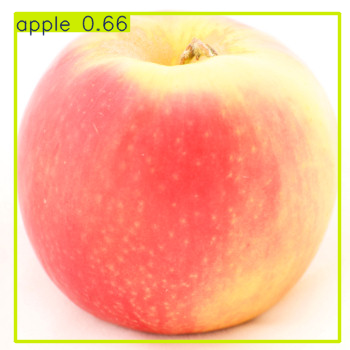


image 1/1 /content/drive/MyDrive/fruit detection/test/apple_77.jpg: 512x640 4 apples, 483.6ms
Speed: 10.3ms preprocess, 483.6ms inference, 1.9ms postprocess per image at shape (1, 3, 512, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([47., 47., 47., 47.])
conf: tensor([0.6938, 0.6305, 0.5821, 0.3916])
data: tensor([[209.9872, 143.6586, 299.8707, 226.9988,   0.6938,  47.0000],
        [110.3769, 133.0316, 215.4121, 224.8311,   0.6305,  47.0000],
        [ 70.9931,  62.1917, 174.3369, 162.1986,   0.5821,  47.0000],
        [ 11.0681,  20.7470,  95.6391, 106.4919,   0.3916,  47.0000]])
id: None
is_track: False
orig_shape: (229, 300)
shape: torch.Size([4, 6])
xywh: tensor([[254.9290, 185.3287,  89.8834,  83.3403],
        [162.8945, 178.9314, 105.0352,  91.7995],
        [122.6650, 112.1952, 103.3437, 100.0069],
        [ 53.3536,  63.6195,  84.5710,  85.7449]])
xywhn: tensor([[0.8498, 0.8093, 0.2996, 0.3639],
        [0.5430, 0.7814, 0.3501, 0.4009],
        

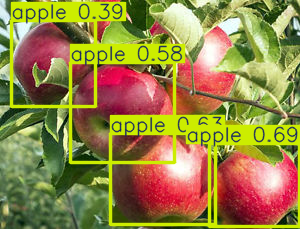

In [45]:
# model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)


image_dir = '/content/drive/MyDrive/fruit detection/test'


for i, image_file in enumerate(os.listdir(image_dir)[:5]):  # tylko przykladowy run
    if image_file.endswith(('.jpg', '.png', '.jpeg')):
        image_path = os.path.join(image_dir, image_file)
        results = model(image_path)


        for result in results:
            print(result.boxes)  # bounding boxes
            annotated_frame = result.plot()
            cv2_imshow(annotated_frame)

# 4. Wykorzystaj metodę R-CNN, Fast R-CNN, Faster R-CNN lub Masked R-CNN do wygenerowania propozycji ramek

In [32]:
!pip install torch torchvision


In [33]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [46]:
# Ładowanie modelu Faster R-CNN pretrenowanego na zbiorze COCO
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Ustawienie trybu ewaluacyjnego dla predykcji


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [35]:
# Funkcja do ładowania obrazu
def load_image(img_path):
    """Ładuje obraz i konwertuje do formatu RGB."""
    image = Image.open(img_path).convert("RGB")
    return image

# Funkcja do przetwarzania obrazu do formatu oczekiwanego przez model
def preprocess_image(image):
    """Konwertuje obraz do tensora i normalizuje go."""
    return F.to_tensor(image)

# Przykładowe obrazy do analizy
test_images = os.listdir(image_dir)[:5]


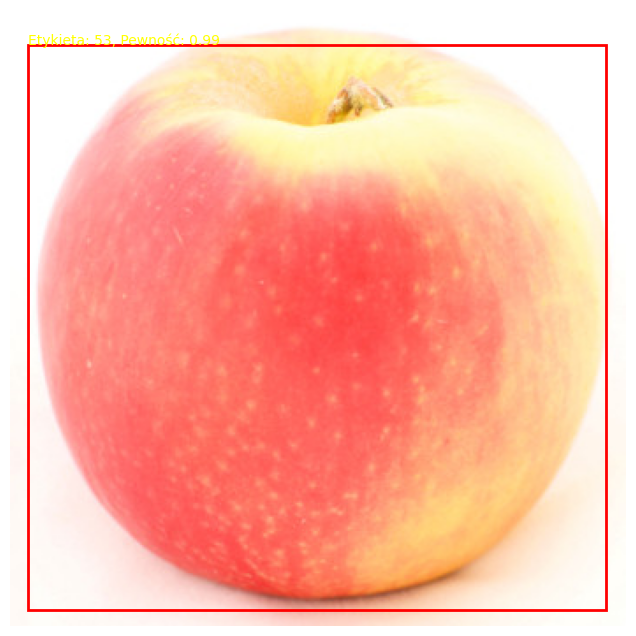

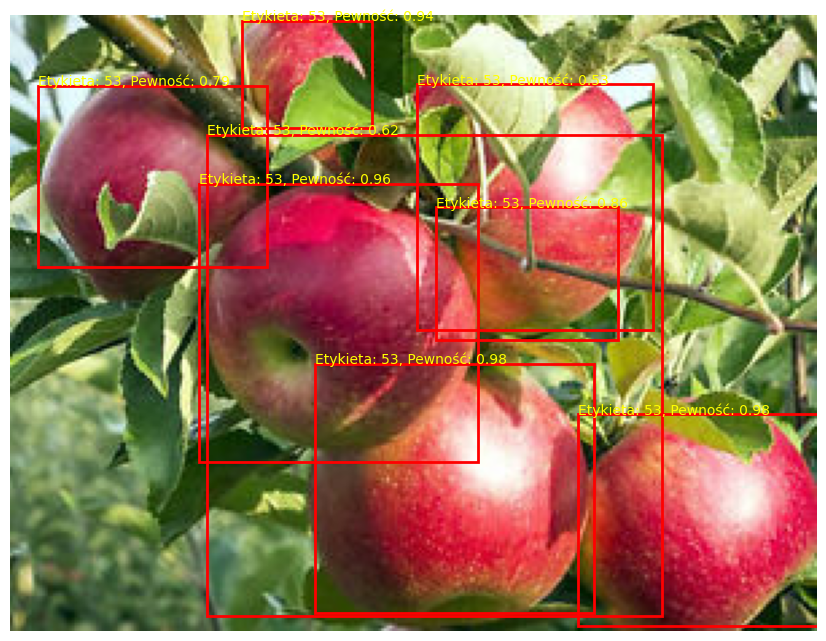

In [48]:
# Przetwarzanie i detekcja obiektów dla przykładowych obrazów
for img_file in test_images:
    # Sprawdzenie, czy plik jest obrazem
    if img_file.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(image_dir, img_file)
        image = load_image(img_path)
        image_tensor = preprocess_image(image).unsqueeze(0)  # Dodanie wymiaru batch

        # Generowanie propozycji ramek i klasyfikacja obiektów
        with torch.no_grad():
            outputs = model(image_tensor)

        # Ekstrakcja ramek, etykiet i wyników
        boxes = outputs[0]['boxes'].numpy()
        labels = outputs[0]['labels'].numpy()
        scores = outputs[0]['scores'].numpy()

        # Wyświetlanie wyników na obrazach z narysowanymi ramkami
        fig, ax = plt.subplots(1, 1, figsize=(12, 8))
        ax.imshow(image)
        for i, (box, label, score) in enumerate(zip(boxes, labels, scores)):
            if score > 0.5:  # Tylko detekcje o wysokim zaufaniu
                # Dodanie prostokąta wokół wykrytego obiektu
                ax.add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1],
                                           edgecolor='red', linewidth=2, fill=False))
                # Dodanie etykiety i wyniku
                ax.text(box[0], box[1], f"Etykieta: {label}, Pewność: {score:.2f}", color='yellow')
        plt.axis('off')
        plt.show()